# Report Topic:
Conduct an in-depth analysis of the sales data of a well-known e-commerce platform using the RFM model, and create a dashboard.'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

In [3]:
df_path = 'C:/Users/Tony/Downloads/电子产品销售分析.csv'
df_u = pd.read_csv(df_path)

## 1. Data Preprocessing

In [4]:
df_u.describe()

,Unnamed: 0,order_id,product_id,category_id,price,user_id,age
count,5.641690e+05,5.641690e+05,5.641690e+05,5.641690e+05,564169.000000,5.641690e+05,564169.000000
mean,1.792965e+06,2.370552e+18,1.695711e+18,2.272919e+18,208.269324,1.515916e+18,33.184388
std,7.745342e+05,2.025138e+16,3.290688e+17,2.158282e+16,304.559875,2.379056e+07,10.122088
min,0.000000e+00,2.294360e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+18,16.000000
25%,1.658965e+06,2.353294e+18,1.515966e+18,2.268105e+18,23.130000,1.515916e+18,24.000000
50%,1.861597e+06,2.376886e+18,1.515966e+18,2.268105e+18,87.940000,1.515916e+18,33.000000
75%,2.473370e+06,2.388441e+18,1.515966e+18,2.268105e+18,277.750000,1.515916e+18,42.000000
max,2.633520e+06,2.388441e+18,2.388434e+18,2.374499e+18,18328.680000,1.515916e+18,50.000000


In [5]:
df_u.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


In [6]:
df_u.fillna('no_brand',inplace = True)
df_u = df_u.drop_duplicates('order_id')
df_u['event_time'] = pd.to_datetime(df_u['event_time']).dt.to_period('D')
df_u = df_u.set_index('event_time',drop = False)
df_u['month'] = df_u['event_time'].dt.month

In [7]:
df = df_u
user_record=df.groupby('user_id')['order_id'].count().sort_values(ascending=False)

In [8]:
user_record.describe()

count    93823.000000
mean         4.269081
std         18.192114
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        666.000000
Name: order_id, dtype: float64

In [25]:
pd.set_option('display.float_format', '{:.2f}'.format)
user_record[user_record == 666].astype(str)

user_id
1515915625512377088.00    666
Name: order_id, dtype: object

In [9]:
np.percentile(user_record,90)

6.0

In [12]:
np.percentile(user_record,99)

35.0

In [15]:
df = df_u
df_b = df.loc[df['user_id'].isin(user_record[user_record < 6].index)]
df_b['user_level'] = 'B'
df_a = df.loc[df['user_id'].isin(user_record[(user_record >= 6) & (user_record <= 35)].index)]
df_a['user_level'] = 'A'
df_ab = pd.concat([df_a, df_b])


We have observed significant variation in the number of orders placed by users, with the highest being 666 and the average being only 35. Considering that 90% of users place fewer than 6 orders, we use this as a dividing point to categorize our customers. Customers with more than 6 orders are classified as Category A, while those with fewer than 6 orders are classified as Category B.Users we have made more than 35 purchase (95 percentile) are marked as outliers.

In [19]:
sum(df_a['price'])/sum(df_b['price'])

0.6311534939080452

In [26]:
sum(df.loc[df['user_id']==1515915625512377088]['price'])/sum(df['price'])

0.0010988158711104034

After calculation, it was found that although the number of Category B customers is significantly higher than that of Category A, the total expenditure of Category A customers is about 63% of that of Category B customers, playing a key role in supporting the overall sales data of the company. The highest-spending user accounts for 0.1% of the total sales. Given the smaller overall number of Category A customers, our focus will be on Category B customers. However, as Category A customers are the main customer group in terms of sales, they can be subject to more in-depth analysis in the future.

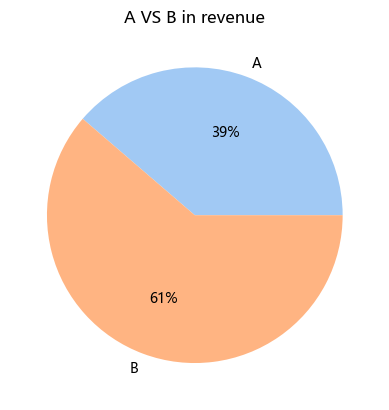

In [27]:
x=df_ab.groupby('user_level')['price'].sum()
colors = sb.color_palette('pastel')[0:5]
plt.pie(x, labels = x.index, colors = colors, autopct='%.0f%%')
plt.title('A VS B in revenue')
plt.show()

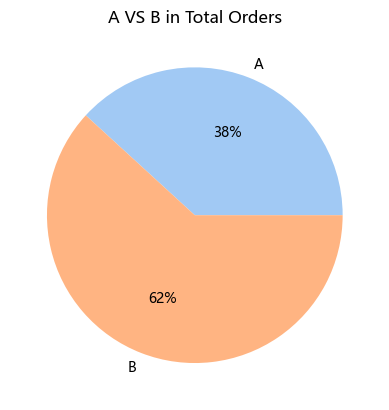

In [28]:
x=df_ab.groupby('user_level')['event_time'].count()
plt.pie(x, labels = x.index, colors = colors, autopct='%.0f%%')
plt.title('A VS B in Total Orders')
plt.show()

## 2. Consumer Demographics/Portrait Analysis"

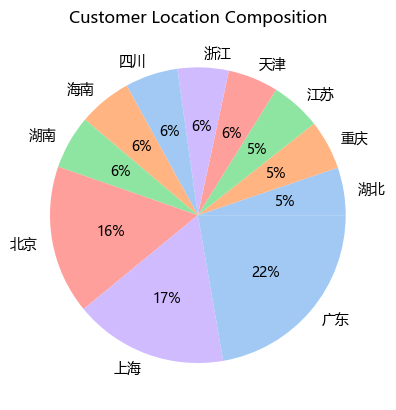

In [29]:
locc = df.groupby('local')['price'].sum().sort_values()
plt.pie(locc, labels = locc.index,colors = colors,autopct='%.0f%%')
plt.title('Customer Location Composition')
plt.show()

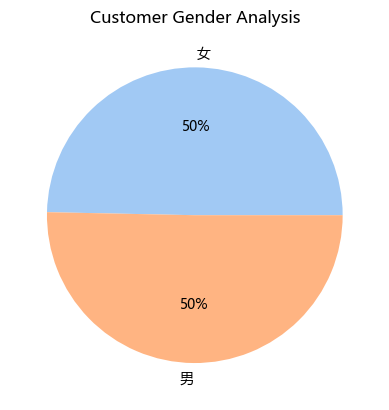

In [30]:
gender =  df.groupby('sex')['price'].sum().sort_values()
plt.pie(gender, labels = gender.index, colors=colors, autopct='%.0f%%')
plt.title('Customer Gender Analysis')
plt.show()

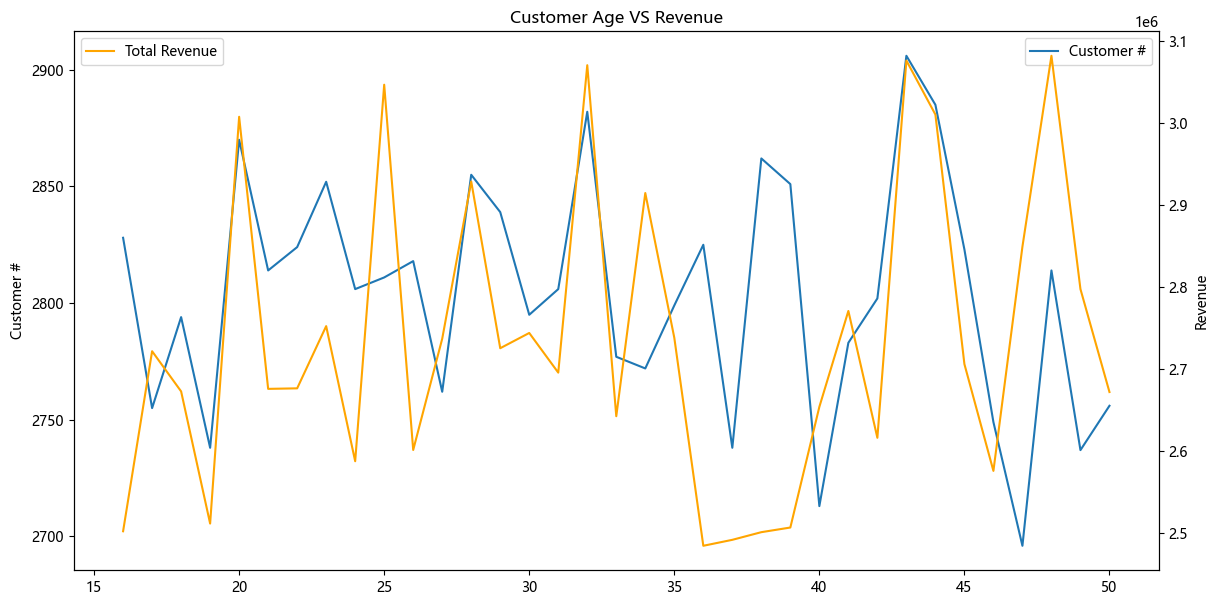

In [31]:
ax1 = df.groupby('age')['user_id'].nunique().rename('Customer #').plot(title='Customer Age VS Revenue',ylabel='Customer #',xlabel='',legend=1)
df.groupby('age')['price'].sum().rename('Total Revenue').plot(ax=ax1.twinx(),color='orange',figsize=(14,7),ylabel='Revenue',legend=True,xlabel='').legend(loc=2)

We have noticed that Beijing, Shanghai, and Guangzhou account for more than half of the sales, suggesting an opportunity to increase marketing efforts in first-tier cities. Additionally, it has been found that customer age and gender do not have much correlation with sales.

## 3. Revenue By Brand

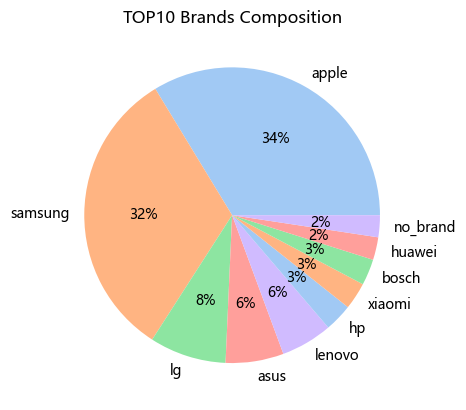

In [32]:
brand =  df.groupby('brand')['price'].sum().sort_values(ascending=False).head(10)
plt.pie(brand, labels = brand.index, colors=colors, autopct='%.0f%%')
plt.title('TOP10 Brands Composition')
plt.show()

In [261]:
brand

brand
samsung    14062366.69
apple      13095763.25
lg          3656356.76
asus        2828600.43
lenovo      2241106.90
hp          1544365.96
xiaomi      1286315.31
beko        1258039.12
huawei      1142222.82
bosch       1086321.46
Name: price, dtype: float64

In [33]:
#Top10 Brands to total sales
brand.sum()/df['price'].sum()

0.7460715195455874

In [34]:
dfa=df_ab.groupby(['brand','user_level'],as_index=False)['price'].sum().sort_values(by=['price'],ascending=False).head(10)

In [35]:
dfa

,brand,user_level,price
69,apple,B,13826214.90
1087,samsung,B,10675230.70
68,apple,A,7453296.36
1086,samsung,A,7118607.76
732,lg,B,2567843.10
102,asus,B,2282438.36
728,lenovo,B,1969806.70
731,lg,A,1765139.36
101,asus,A,1593403.50
727,lenovo,A,1239426.66


Text(0.5, 1.0, 'Top10品牌销售图')

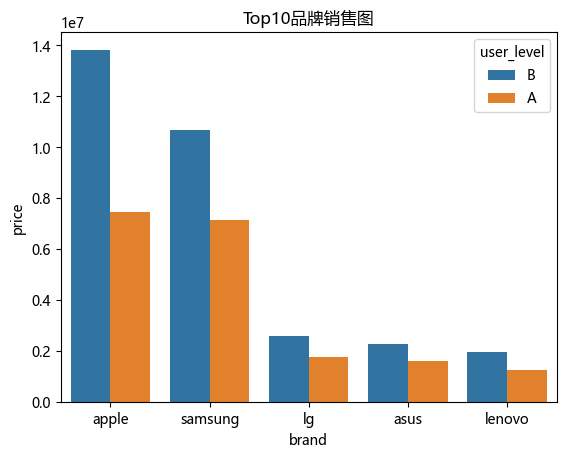

In [36]:
sb.barplot(x= 'brand',
           y='price',
           hue="user_level",
           data=dfa).set_title('Top10品牌销售图')

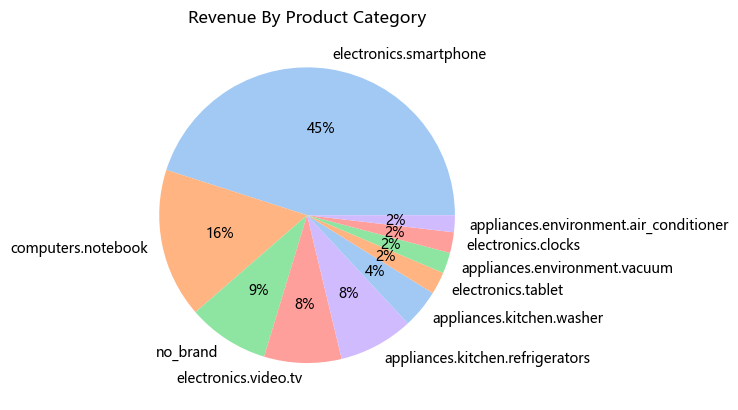

In [37]:
cate=df.groupby('category_code')['price'].sum().sort_values(ascending=False).head(10)
plt.pie(cate, labels = cate.index,colors=colors, autopct='%.0f%%')
plt.title('Revenue By Product Category')
plt.show()

Despite a diverse range of products, electronics like smartphones and computers still account for the majority of sales, with related brands occupying top positions in brand sales. In light of this, e-commerce has a demand for diversification, and there is still a need to increase investment in other product categories.

## 4. Revenue Analysis

In [38]:
fmri = (df_ab.groupby([df_ab['event_time'].dt.month])['price'].sum()).to_frame()
fmri['month']=fmri.index

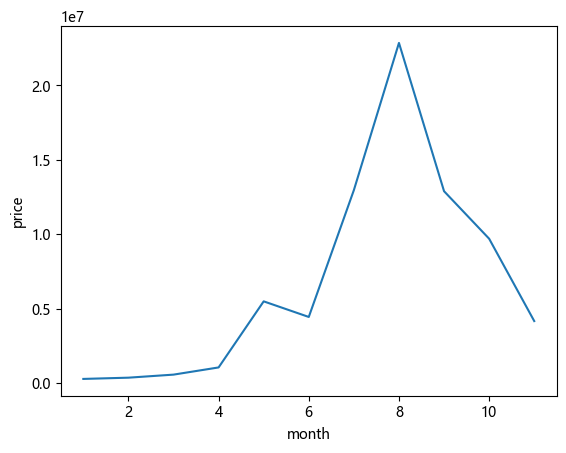

In [39]:
sb.lineplot( x = "month",
             y = "price",
             data = fmri);

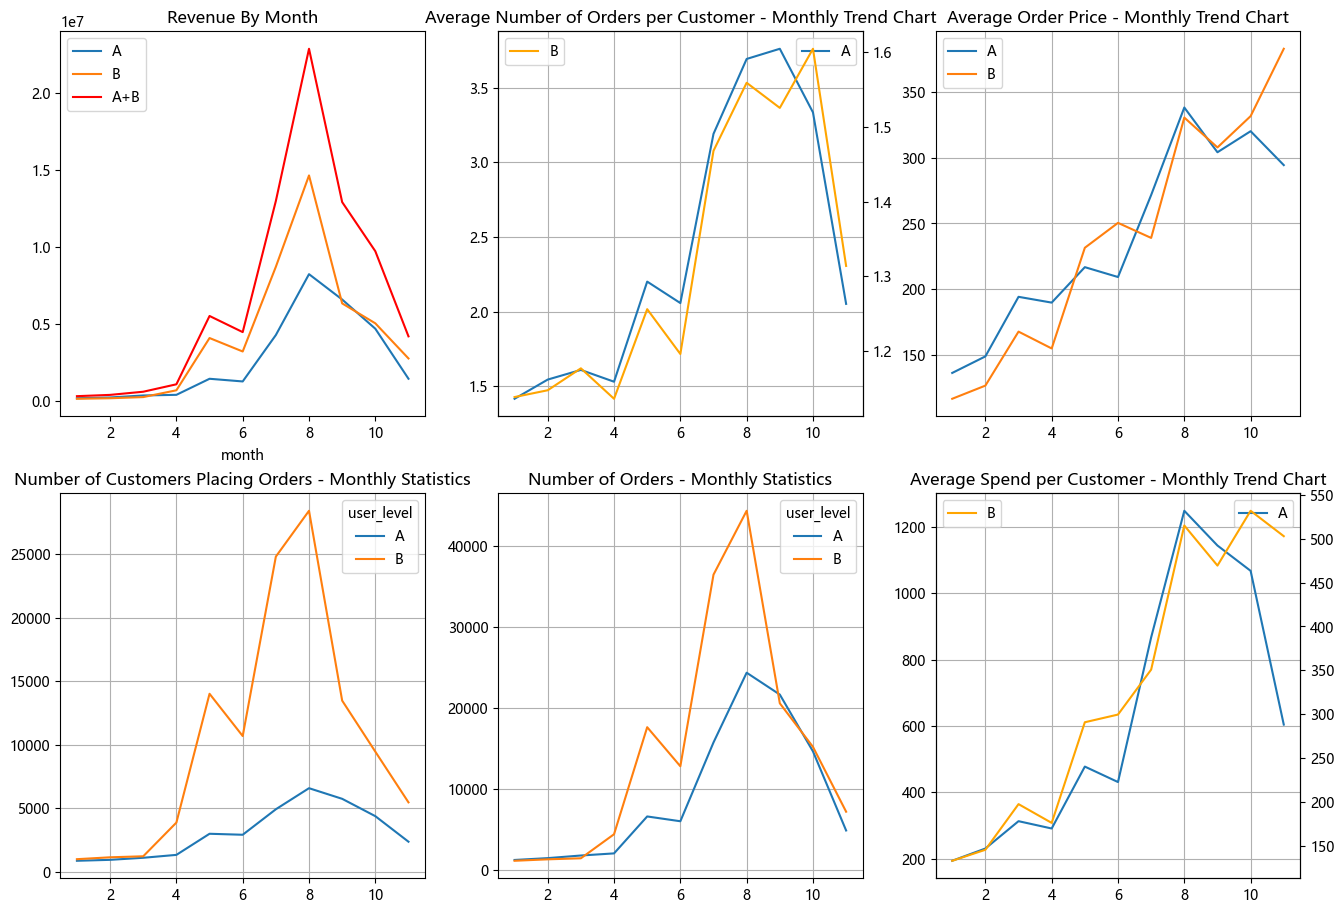

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(16, 11))

df_ab.groupby(['month', 'user_level'])['price'].sum().unstack().plot(grid=True, title='Revenue By Month', ax=axs[0, 0])
df_ab.groupby('month')['price'].sum().rename('A+B').plot(ax=axs[0, 0], color='r').legend(loc=2)

df_ab.groupby(['month', 'user_level'])['order_id'].count().unstack().plot(grid=True, title='Number of Orders - Monthly Statistics', xlabel='', ax=axs[1, 1])

(df_a.groupby('month')['price'].sum() / df_a.groupby('month')['order_id'].count()).rename('A').plot(xlabel='', ax=axs[0, 2])
(df_b.groupby('month')['price'].sum() / df_b.groupby('month')['order_id'].count()).rename('B').plot(grid=True, title='Average Order Price - Monthly Trend Chart', xlabel='', ax=axs[0, 2]).legend(loc=2)

df_ab.groupby(['month', 'user_level']).user_id.nunique().unstack().plot(grid=True, title='Number of Customers Placing Orders - Monthly Statistics', xlabel='', ax=axs[1, 0])

ax2 = (df_a.groupby('month')['order_id'].count() / df_a.groupby('month').user_id.nunique()).rename('A').plot(grid=True, xlabel='', ax=axs[0, 1], legend=1)
(df_b.groupby('month')['order_id'].count() / df_b.groupby('month').user_id.nunique()).rename('B').plot(title='Average Number of Orders per Customer - Monthly Trend Chart', xlabel='', ax=ax2.twinx(), color='orange').legend(loc=2)

ax1 = (df_a.groupby('month')['price'].sum() / df_a.groupby('month').user_id.nunique()).rename('A').plot(grid=True, xlabel='', ax=axs[1, 2], legend=1)
(df_b.groupby('month')['price'].sum() / df_b.groupby('month').user_id.nunique()).rename('B').plot(title='Average Spend per Customer - Monthly Trend Chart', xlabel='', ax=ax1.twinx(), color='orange').legend(loc=2)

The peak in sales occurred in August. After a detailed analysis, it was discovered that August saw a phenomenon of simultaneous growth in quantity and price, with an overall positive growth trend. It is noteworthy that compared to Category A customers, there was an abnormal increase in the number of orders placed by Category B customers in August. Given the limited data available after August, no further analysis will be conducted for the subsequent months.

### 4.1 Member Analysis

In [41]:
def active_status(x):
    status = []
    for i in range(11):
        if x[i]==0:
            if i ==0:
                status.append('unreg')
            else:
                status.append('unreg') if status[i-1]=='unreg' else status.append('unactive')
        else:
            if i==0:
                status.append('reg')
            else:
                if status[i-1]=='unreg':
                    status.append('reg')
                else:
                    status.append('ret') if status[i-1]=='unactive' else status.append('old')
    return pd.Series(status,index = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
        

In [42]:
order_record = df.pivot_table(index = 'user_id',columns='month',values ='price',aggfunc='sum').fillna(0)
order_record.columns = df['month'].sort_values().astype('str').unique()
user_active_status = order_record.apply(active_status,axis = 1)

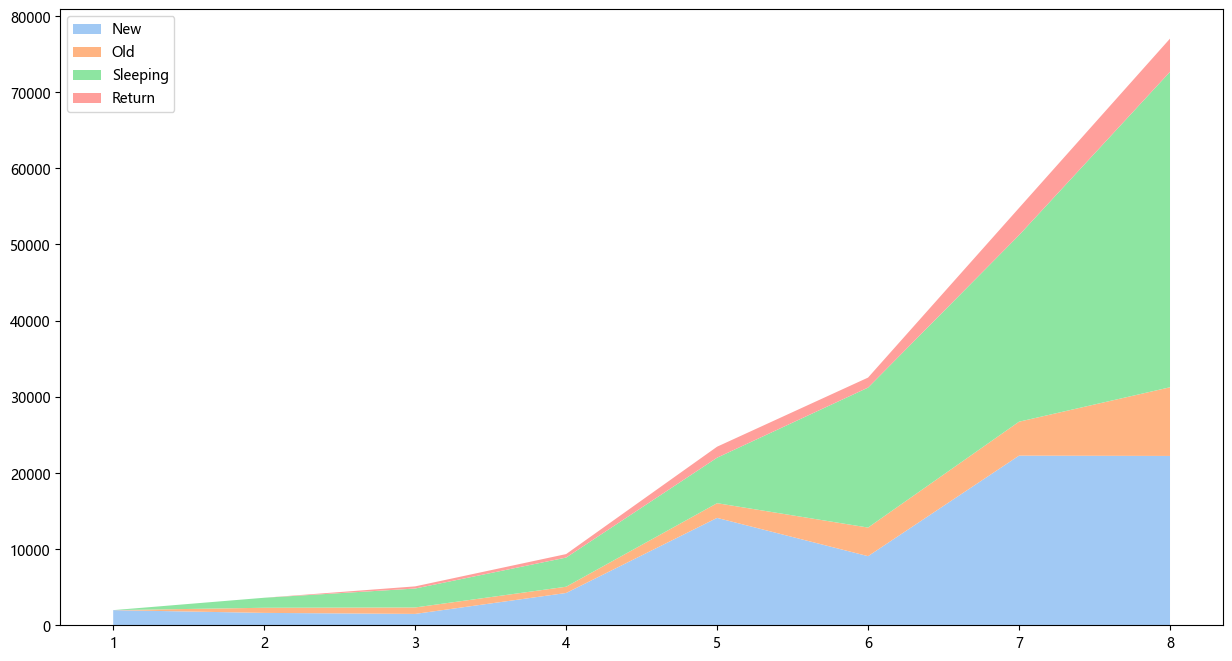

In [43]:
ax1= user_active_status.apply(lambda x: pd.value_counts(x)).drop('unreg').fillna(0).T
ax1['month']=ax1.index
ax1 = ax1.drop(['9','10','11'])
plt.figure(figsize = (15,8))
plt.stackplot(ax1.month,ax1.reg,ax1.old,ax1.unactive,ax1.ret,colors=colors, labels = ['New','Old','Sleeping','Return'])
plt.legend(loc='upper left')
plt.show()

The data shows that the increase in sales volume in August can be attributed to the accumulation of old customers. Starting from May, there was a large-scale return of old customers. A review of the operational strategies implemented for registered users during this period can be conducted to summarize experiences. The registration of new users has consistently remained at a low level. From an ROI perspective, targeted marketing activities for new users can be considered.

### 4.2 Repeat Purchase rate(Category B)

In [44]:
order_total = df_b.groupby('user_id').agg({'order_id':pd.Series.count,'price':np.max}).groupby('order_id').count().head(10)
order_fq=[]
for i in range(10):
    a=order_total.iloc[i:].sum()
    order_fq.append(a[0])
order_fq = pd.Series(order_fq,index = list(range(1,11)))
order_fq = order_fq.to_frame()

In [45]:
order_fq = (order_fq.pct_change(periods=1)+1)
order_fq = order_fq.drop([1])
order_total['month'] = order_total.index

Text(0.5, 1.0, 'Repeat Purchas Rate VS total Order')

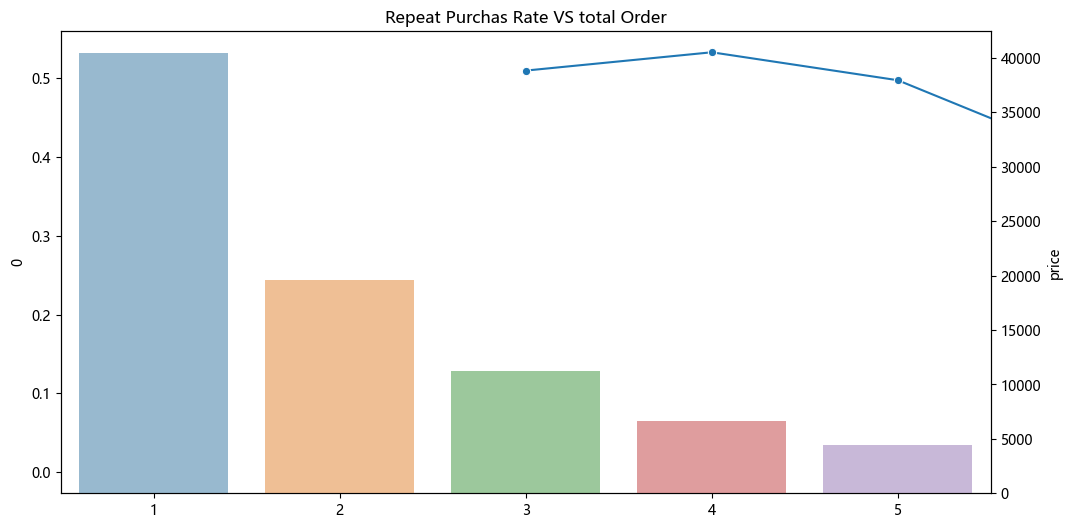

In [46]:
fig, ax1 = plt.subplots(figsize=(12,6))

sb.lineplot(data = order_fq[0], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sb.barplot(data = order_total, x='month', y='price', alpha=0.5, ax=ax2)
plt.title('Repeat Purchas Rate VS total Order')

According to the data, the repurchase rate of this e-commerce has been consistently high (around 80%) but gradually decreases after the eighth order. Considering that the industry average is only 40%, this indicates that the loyalty of members has been well maintained.

### 4.3 Customer Purchase Recency

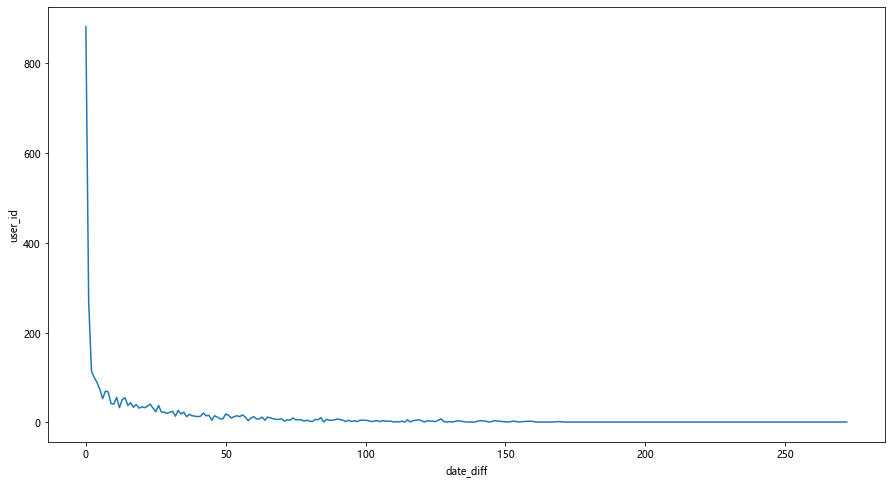

In [213]:
plt.figure(figsize = (15,8))
sb.lineplot( x = "date_diff",
             y = "user_id",
             data = cond)

The data reveals that customers' second purchases generally occur within a few days, but a significant portion also occurs after a much longer period (beyond 100 days). It is recommended to regularly conduct follow-up operations for customers who have just placed an order, to ensure that they make a second purchase within a shorter timeframe and prevent them from becoming inactive.

## 5. Customer RFM division

In [69]:
freq = (df.groupby(['user_id'])['order_id'].count()).to_frame().reset_index()
money = (df.groupby(['user_id'])['price'].sum()).to_frame().reset_index()

In [70]:
freq['order_id'].median()

2.0

In [71]:
money['price'].median()

407.35

In [72]:
con = pd.merge(left=freq,right =  money,how = 'inner', on = 'user_id')

In [73]:
def rfm(row):
    if row['order_id']>2 and row['price']>407.35:
        return 'Important'
    elif row['order_id']>2 and row['price']<407.35:
        return 'High Frequency'
    elif row['order_id']<2 and row['price']<407.35:
        return 'Testing'
    else:
        return 'High Potential'
    
con['type']=con.apply (lambda row: rfm(row), axis=1)
con = con.groupby(['type']).count()
con = con.drop(['order_id','price'],axis=1)
con = con.squeeze()

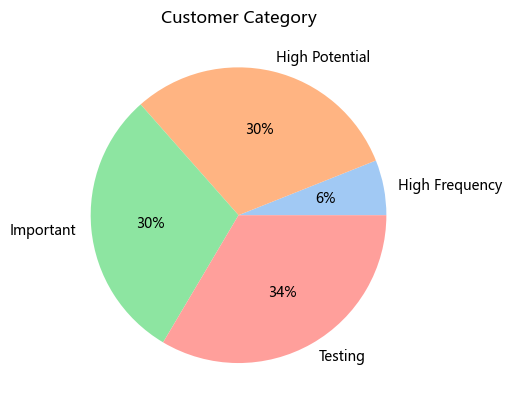

In [75]:
plt.pie(con, labels = con.index,colors=colors, autopct='%.0f%%')
plt.title('Customer Category')
plt.show()

The operations department can develop marketing plans targeting different types of customers. It should be noted that a significant portion of customers (observed users) exhibit low order quantities and low spending. It is advised to initiate targeted marketing activities for these customers to increase their activity levels.

# Conclusions:

1. The data shows that the membership management system is quite outstanding, with a high repurchase rate and high-value customers accounting for a significant proportion of sales.
2. The number of new registered users has consistently been low, which suggests a need to increase marketing efforts in this area.
3. During the summer, there was a noticeable increase in sales volume and price, and many dormant users chose to return. A review of the marketing data during this period can be conducted to summarize experiences.
4. Electronics still dominate the main business, and there is a high dependence on the top ten brands.
5. Despite the high repurchase rate, the interval between many users' second orders and their first orders is still long. It is recommended to enhance follow-up marketing services for customers who have recently placed an order."